# 第3部　記述統計

## 6章　層別分析

### 実装：分析の準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd

# 複雑な統計処理を行うライブラリ
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
np.set_printoptions(linewidth=60)
pd.set_option('display.width', 60)

### 実装：分析対象となるデータの用意

In [3]:
fish_multi = pd.read_csv('3-6-1-fish_multi.csv')
print(fish_multi.head(3))

  species  length
0       A       2
1       A       3
2       A       3


In [4]:
# サンプルサイズ
len(fish_multi)

20

In [5]:
# 魚の種類
fish_multi['species'].value_counts()

A    10
B    10
Name: species, dtype: int64

In [6]:
# 標本平均
np.mean(fish_multi['length'])

5.5

### 実装：グループ別の統計量の計算

#### グループ別の平均値

In [7]:
# 魚の種類ごとの集計
group = fish_multi.groupby('species')
print(group.mean())

         length
species        
A           4.0
B           7.0


In [8]:
# 1行でまとめて記載
print(fish_multi.groupby('species').mean())

         length
species        
A           4.0
B           7.0


#### グループ別の要約統計量

In [9]:
# 要約統計量
print(group.describe())

        length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0


#### pandas以外の関数を使う

In [10]:
print(group.agg(stats.mode))

             length
species            
A        ([4], [4])
B        ([7], [4])


### 実装：ペンギンデータの読み込み

#### データの読み込み

In [11]:
# seaborn組み込みのペンギンのデータを取得
penguins = sns.load_dataset('penguins')
print(penguins.head(n=2))

  species     island  bill_length_mm  bill_depth_mm  \
0  Adelie  Torgersen            39.1           18.7   
1  Adelie  Torgersen            39.5           17.4   

   flipper_length_mm  body_mass_g     sex  
0              181.0       3750.0    Male  
1              186.0       3800.0  Female  


#### データのチェック

In [12]:
# 鳥の種類の分布
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [13]:
# Torgersen島のデータだけを抽出
penguins.query('island == "Torgersen"')['species'].value_counts()

Adelie    52
Name: species, dtype: int64

In [14]:
# Biscoe島のデータだけを抽出
penguins.query('island == "Biscoe"')['species'].value_counts()

Gentoo    124
Adelie     44
Name: species, dtype: int64

In [15]:
# Torgersen島のデータだけを抽出
penguins.query('island == "Dream"')['species'].value_counts()

Chinstrap    68
Adelie       56
Name: species, dtype: int64

### 実装：ペンギンデータの層別分析

In [16]:
# ベンギンの種別・性別の集計
group_penguins = penguins.groupby(['species', 'sex'])
print(group_penguins.mean()['body_mass_g'])

species    sex   
Adelie     Female    3368.835616
           Male      4043.493151
Chinstrap  Female    3527.205882
           Male      3938.970588
Gentoo     Female    4679.741379
           Male      5484.836066
Name: body_mass_g, dtype: float64


In [17]:
# ベンギンの種別・島別・性別の集計
group_penguins = penguins.groupby(['species', 'island', 'sex'])
print(group_penguins.mean()['body_mass_g'])

species    island     sex   
Adelie     Biscoe     Female    3369.318182
                      Male      4050.000000
           Dream      Female    3344.444444
                      Male      4045.535714
           Torgersen  Female    3395.833333
                      Male      4034.782609
Chinstrap  Dream      Female    3527.205882
                      Male      3938.970588
Gentoo     Biscoe     Female    4679.741379
                      Male      5484.836066
Name: body_mass_g, dtype: float64


### 実装：欠損値の扱いに注意

#### 欠測値

In [18]:
# body_mass_gの４番目の値は欠測
print(penguins[['species','body_mass_g']].head(n = 4))

  species  body_mass_g
0  Adelie       3750.0
1  Adelie       3800.0
2  Adelie       3250.0
3  Adelie          NaN


In [19]:
# 参考：欠損データの抽出（教科書には載っていないコードです）
# Adelie種のペンギンでbody_mass_gが欠測であるのは１データのみです
penguins[penguins.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


#### 欠測値に対する挙動

In [20]:
# 種別でグループ分けしてbody_mass_gのサンプルサイズを調べる
group_sp = penguins.groupby(['species'])
print(group_sp.count()['body_mass_g'])

species
Adelie       151
Chinstrap     68
Gentoo       123
Name: body_mass_g, dtype: int64


In [21]:
# サンプルサイズを151と考えて平均値を計算
round(group_sp.sum()['body_mass_g'].Adelie / 151, 3)

3700.662

In [22]:
# 層別に平均値を計算
round(group_sp.mean()['body_mass_g'].Adelie, 3)

3700.662

### 実装：単純なヒストグラム

In [23]:
bins = np.arange(2,11,1)
bins

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

<AxesSubplot:xlabel='length', ylabel='Count'>

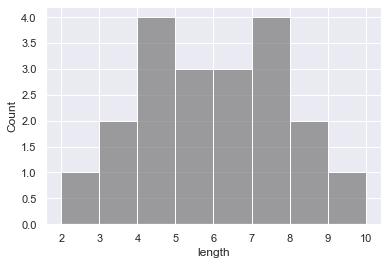

In [24]:
sns.histplot(x='length',      # x軸
             data=fish_multi, # データ
             bins=bins,       # bins
             color='gray')  # 色の指定(グレースケール)

### 実装：グループ別のヒストグラム

<AxesSubplot:xlabel='length', ylabel='Count'>

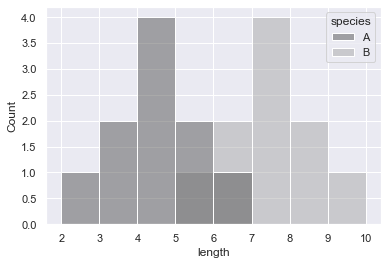

In [25]:
sns.histplot(x='length',      # x軸
             hue='species',   # 色分けの対象
             data=fish_multi, # データ
             bins=bins,       # bins
             palette='gray')  # 色の指定(グレースケール)

#### （以下は参考）層別のカーネル密度推定も、ヒストグラムと同様に実行可能です

<AxesSubplot:xlabel='length', ylabel='Density'>

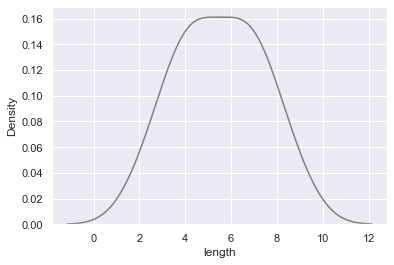

In [26]:
# 単純なカーネル密度推定の結果(書籍には載っていないコードです)
sns.kdeplot(data=fish_multi, # データ
             x='length',     # x軸
             color='gray')   # 色の指定(グレースケール)

<AxesSubplot:xlabel='length', ylabel='Density'>

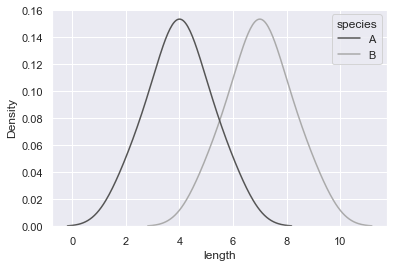

In [27]:
# グループ別にしたカーネル密度推定の結果(書籍には載っていないコードです)
sns.kdeplot(data=fish_multi,  # データ
             x='length',      # x軸
             hue='species',   # 色分けの対象
             palette='gray')  # 色の指定(グレースケール)